# Laboratorio di simulazioni numeriche
### Esercizio 11.3

Si richiede di estendere il codice fornito per fittare la funzione 

$$f(x,y) = \sin(x^2+y^2)$$

negli intervalli $x \in [-3/2,3/2]$, $y \in [-3/2,3/2]$. 

La rete scelta ha le seguenti caratterischiche: 
- architettura: 2-20-20-20-1;
- funzioni di attivazione: relu;
- ottimizzatore: adam;
- loss: mse.

### Codice utilizzato

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

In [2]:
np.random.seed(0)
x_train = np.zeros((400, 2))
x_train[:,0] = np.random.uniform(-1.5, 1.5, 400)
x_train[:,1] = np.random.uniform(-1.5, 1.5, 400)
x_valid = np.zeros((40, 2))
x_valid[:,0] = np.random.uniform(-1.5, 1.5, 40)
x_valid[:,1] = np.random.uniform(-1.5, 1.5, 40)

y_target = np.sin(x_valid[:,0]**2 + x_valid[:,1]**2) #funzione esatta

sigma = 0.0 
y_train = np.random.normal(np.sin(x_train[:,0]**2 + x_train[:,1]**2), sigma) 
y_valid = np.random.normal(np.sin(x_valid[:,0]**2 + x_valid[:,1]**2), sigma)

In [3]:
model = tf.keras.Sequential()
model.add(Dense(20, input_shape=(2,), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mse'])

model.summary()

history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=40, shuffle=True, validation_data=(x_valid, y_valid))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                60        
_________________________________________________________________
dense_1 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 921
Trainable params: 921
Non-trainable params: 0
_________________________________________________________________
Train on 400 samples, validate on 40 samples
Epoch 1/40
400/400 [==============================] - 1s 4ms/sample - loss: 0.3142 - mse: 0.3142 - val_loss: 0.2674 - val_mse: 0.2674
Epoch 2/40
400/400 [==============================] - 0s 200us/sample - loss:

In [4]:
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

40/40 [==============================] - 0s 291us/sample - loss: 0.0954 - mse: 0.0954

Test loss: 0.09542765617370605
Test accuracy: 0.095427655
40/40 [==============================] - 0s 252us/sample - loss: 0.0954 - mse: 0.0954

Test loss: 0.09542765617370605
Test accuracy: 0.095427655


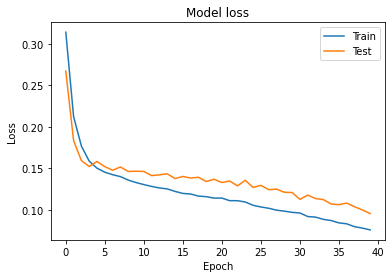

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

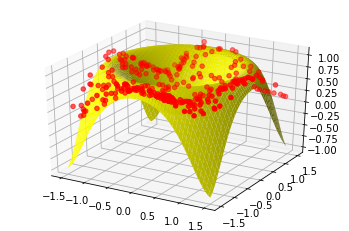

In [9]:
x_predicted = np.zeros((300 ,2))
x_predicted[:,0] = np.random.uniform(-1.5, 1.5, 300)
x_predicted[:,1] = np.random.uniform(-1.5, 1.5, 300)
y_predicted = model.predict(x_predicted)
range = np.linspace (-1.5, 1.5, 200);
[X, Y] = np.meshgrid (range, range);
Z = np.sin (X**2 + Y**2);
a = plt.axes(projection='3d')
a.plot_surface(X, Y, Z, color='yellow')
a.scatter3D(x_predicted[:,0], x_predicted[:,1], y_predicted, color='r')
plt.grid(True)
plt.show()